### Import

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

### Create Data

In [2]:
npoints = 200
X1 = multivariate_normal.rvs(mean=[+1,+1], cov=np.eye(2),size=int(npoints/2));
X2 = multivariate_normal.rvs(mean=[-1,-1], cov=np.eye(2),size=int(npoints/2));

### Labels and Combine

In [3]:
y = np.hstack((np.zeros(int(npoints/2)),np.ones(int(npoints/2))))
y = np.expand_dims(y,-1)
X = np.vstack((X1,X2))

### Plot

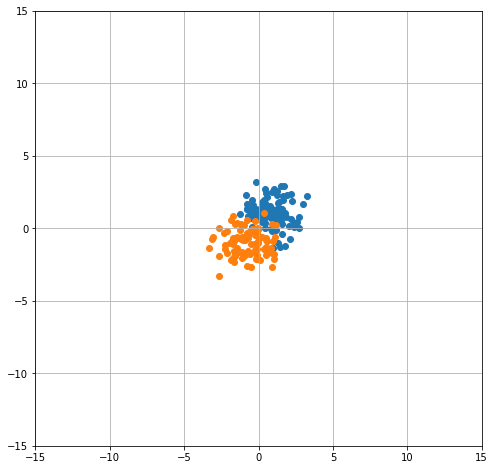

In [4]:
plt.figure(figsize=(8,8))
classes = np.unique(y)
for label in classes:
    indices = np.where(label == y)[0]
    plt.scatter(X[indices,0],X[indices,1])
plt.grid();
plt.axis((-15,15,-15,15));

### Init weights

In [5]:
no_epochs = 10
learning_rate = 0.001
w = np.random.random((2,1)) - 0.5

### Learning Algorithm

In [6]:
history = []
for n in range(no_epochs):
    for i in range(npoints):

        #Compute Activation for this point
        x = X[i,:]
        activation = x[0] * w[0] + x[1] * w[1]

        #Compute prediction and error
        prediction = (activation > 0)*1.0
        desired = y[i]
        error = desired - prediction

        #Update weights
        w[0] = w[0] + (x[0]*error * learning_rate)
        w[1] = w[1] + (x[1]*error * learning_rate)

        #Compute Accuracy
        ypred = (np.dot(X,w) > 0)*1.0
        accuracy = np.sum(ypred == y) / len(y)
        history.append(accuracy)

### Plot Accuracy over each epoch

[[-0.00120711]
 [-0.00192055]]


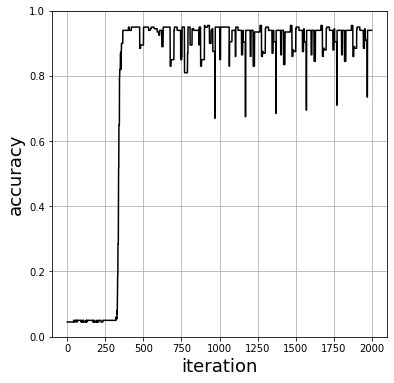

In [7]:
plt.figure(figsize=(6,6))
plt.plot(history,'k');
plt.xlabel('iteration',fontsize=18);
plt.ylabel('accuracy',fontsize=18);
plt.grid()
print(w)

### Final Accuracy

In [266]:
ypred = (np.dot(X,w) > 0) * 1.0;
accuracy = np.sum(ypred == y) / len(ypred);
print(accuracy);

0.92


### Accuracy Landscape

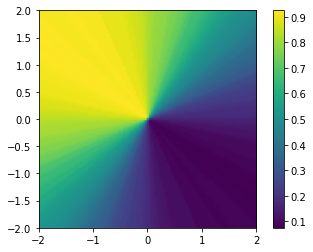

In [280]:
field = np.zeros((101,101))
val = np.linspace(-2,2,101)
for i in range(len(val)):
    for j in range(len(val)):
        w = np.array([val[i],val[j]])
        w = np.expand_dims(w,-1)
        ypred = (np.dot(X,w) > 0) * 1.0;
        accuracy = np.sum(ypred == y) / len(ypred);
        field[i,j] = accuracy
plt.imshow(field,extent=(-2,2,-2,2));
plt.colorbar();